In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime,date
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
import matplotlib.ticker as ticker
import plotly.graph_objects as go
import statsmodels.api as sm
from statsmodels.graphics import tsaplots
plt.rcParams['figure.figsize'] = (20,6)
register_matplotlib_converters()
from pylab import rcParams
from statsmodels.tsa.ar_model import AutoReg
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.ar_model import ar_select_order
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [2]:
weather_data = pd.read_csv("C:/spiced_projects/student-code/thyme-machine-student-code/week7/ECA_blended_custom/TG_STAID002759.txt",skiprows=19)


In [3]:
weather_data.head()

SOUID      DATE     TG   Q_TG
0  127488  18760101     22      0
1  127488  18760102     25      0
2  127488  18760103      3      0
3  127488  18760104    -58      0
4  127488  18760105    -98      0

In [4]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53722 entries, 0 to 53721
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0    SOUID    53722 non-null  int64
 1       DATE  53722 non-null  int64
 2      TG     53722 non-null  int64
 3    Q_TG     53722 non-null  int64
dtypes: int64(4)
memory usage: 1.6 MB


In [5]:
weather_data.describe()

SOUID          DATE            TG          Q_TG
count   53722.000000  5.372200e+04  53722.000000  53722.000000
mean   119303.913481  1.949110e+07     57.455009      0.032668
std      8022.875767  4.245964e+05    612.061081      0.541250
min    111448.000000  1.876010e+07  -9999.000000      0.000000
25%    111448.000000  1.912101e+07     33.000000      0.000000
50%    111448.000000  1.949072e+07     94.000000      0.000000
75%    127488.000000  1.986042e+07    157.000000      0.000000
max    128124.000000  2.023013e+07    305.000000      9.000000

In [6]:
weather_data.columns = weather_data.columns.str.strip()
weather_data.columns

Index(['SOUID', 'DATE', 'TG', 'Q_TG'], dtype='object')

In [7]:
weather_data.rename(columns= {'TG':'mean_temp','Q_TG':'Q_mean_temp'},inplace=True)

In [8]:
weather_data.columns

Index(['SOUID', 'DATE', 'mean_temp', 'Q_mean_temp'], dtype='object')

In [9]:
weather_data.isnull().sum()

SOUID          0
DATE           0
mean_temp      0
Q_mean_temp    0
dtype: int64

In [10]:
weather_data['DATE']=weather_data['DATE'].astype(str)

In [11]:
weather_data['DATE']=pd.to_datetime(weather_data['DATE'])
weather_data.tail()

SOUID       DATE  mean_temp  Q_mean_temp
53717  111448 2023-01-27         16            0
53718  111448 2023-01-28          1            0
53719  111448 2023-01-29         11            0
53720  111448 2023-01-30         38            0
53721  111448 2023-01-31         43            0

In [12]:
weather_data.dtypes

SOUID                   int64
DATE           datetime64[ns]
mean_temp               int64
Q_mean_temp             int64
dtype: object

In [13]:
weather_data=weather_data.set_index('DATE')


In [14]:
weather_data.head()

SOUID  mean_temp  Q_mean_temp
DATE                                      
1876-01-01  127488         22            0
1876-01-02  127488         25            0
1876-01-03  127488          3            0
1876-01-04  127488        -58            0
1876-01-05  127488        -98            0

In [15]:
#converting to C
weather_data['mean_temp']=weather_data['mean_temp']*0.1

<AxesSubplot:xlabel='DATE'>

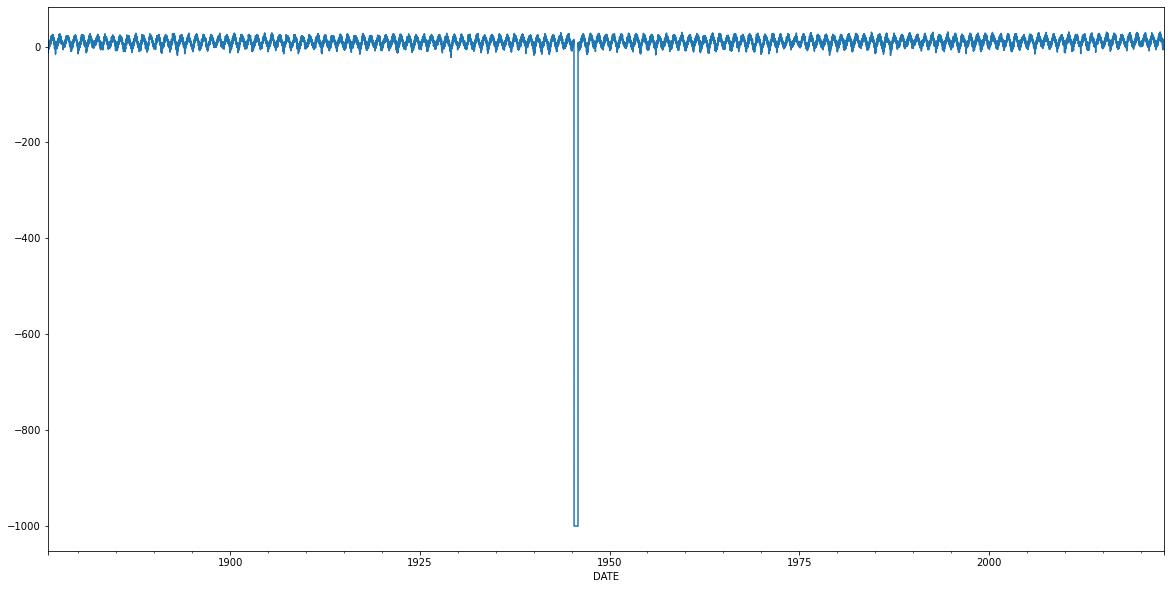

In [16]:
weather_data['mean_temp'].plot(figsize=(20,10))

In [17]:
weather_data[weather_data['Q_mean_temp']==9].value_counts() 

SOUID   mean_temp  Q_mean_temp
127488  -999.9     9              195
dtype: int64

In [18]:
weird_temp= weather_data[(weather_data['Q_mean_temp']==9)]

In [19]:
weird_temp.head()

SOUID  mean_temp  Q_mean_temp
DATE                                      
1945-04-25  127488     -999.9            9
1945-04-26  127488     -999.9            9
1945-04-27  127488     -999.9            9
1945-04-28  127488     -999.9            9
1945-04-29  127488     -999.9            9

In [20]:
weird_temp.tail()

SOUID  mean_temp  Q_mean_temp
DATE                                      
1945-11-01  127488     -999.9            9
1945-11-02  127488     -999.9            9
1945-11-03  127488     -999.9            9
1945-11-04  127488     -999.9            9
1945-11-05  127488     -999.9            9

In [21]:
weird_temp.index.min(), weird_temp.index.max()


(Timestamp('1945-04-25 00:00:00'), Timestamp('1945-11-05 00:00:00'))

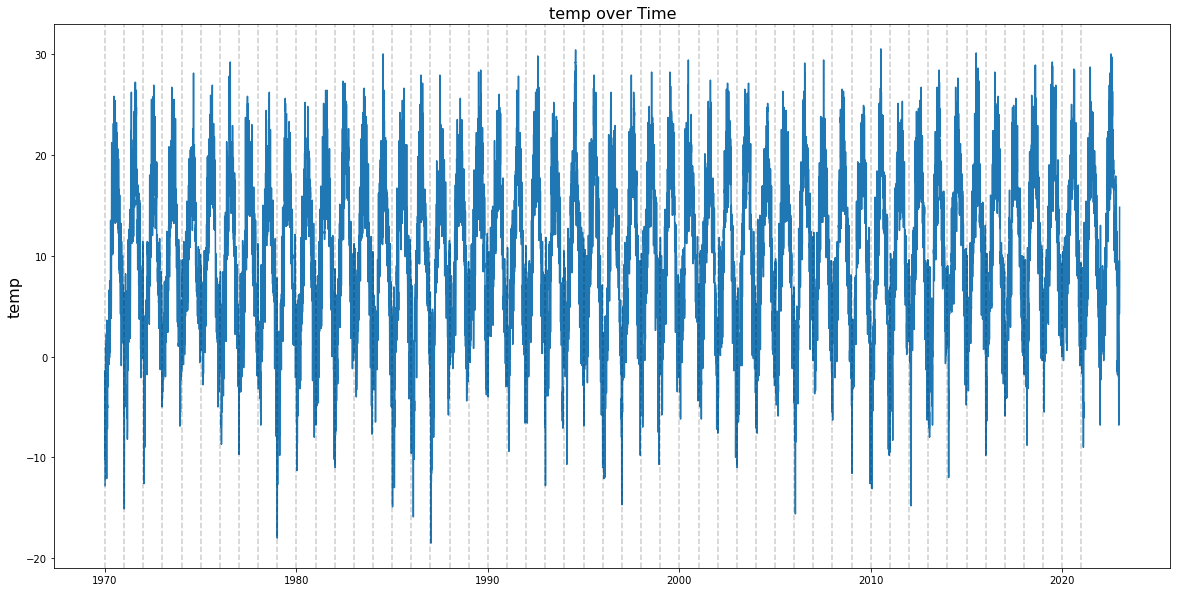

In [22]:
weather_data_new = weather_data.loc['1970-01-01':'2022-12-31'].drop(['Q_mean_temp','SOUID'],axis=1)

plt.figure(figsize=(20,10))
plt.plot(weather_data_new.mean_temp)
plt.title('temp over Time', fontsize=16)
plt.ylabel('temp', fontsize=16)
for year in range(1970,2022):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)


In [23]:
import plotly.express as px
fig= px.line(weather_data_new,x= weather_data_new.index , y= weather_data_new.mean_temp)
fig.update_xaxes(
    rangeslider_visible= True)

In [24]:
weather_data_new.describe()

mean_temp
count  19358.000000
mean      10.093827
std        7.826857
min      -18.500000
25%        4.100000
50%       10.100000
75%       16.300000
max       30.500000

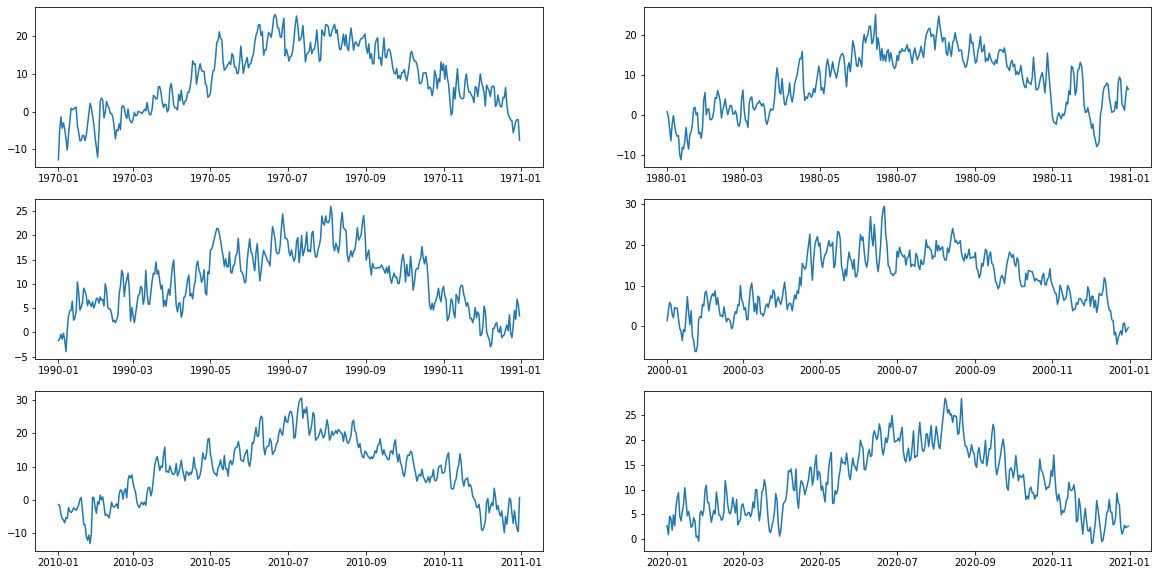

In [25]:

#plt.figure(figsize=(20,10))
#years= list(range(1970,2022,10))
#for year in years:
    #plt.plot(weather_data_new[weather_data_new.index.year==year])
#loc['1970-01-01':'1970-12-31']
    #plt.title(f'temp over {year}', fontsize=16)
    #plt.ylabel('temp', fontsize=16)
fig,ax = plt.subplots(ncols=2,nrows=3)
fig.set_size_inches(20, 10)
ax[0][0].plot(weather_data_new[weather_data_new.index.year==1970])
ax[0][1].plot(weather_data_new[weather_data_new.index.year==1980])
ax[1][0].plot(weather_data_new[weather_data_new.index.year==1990])
ax[1][1].plot(weather_data_new[weather_data_new.index.year==2000])
ax[2][0].plot(weather_data_new[weather_data_new.index.year==2010])
ax[2][1].plot(weather_data_new[weather_data_new.index.year==2020])

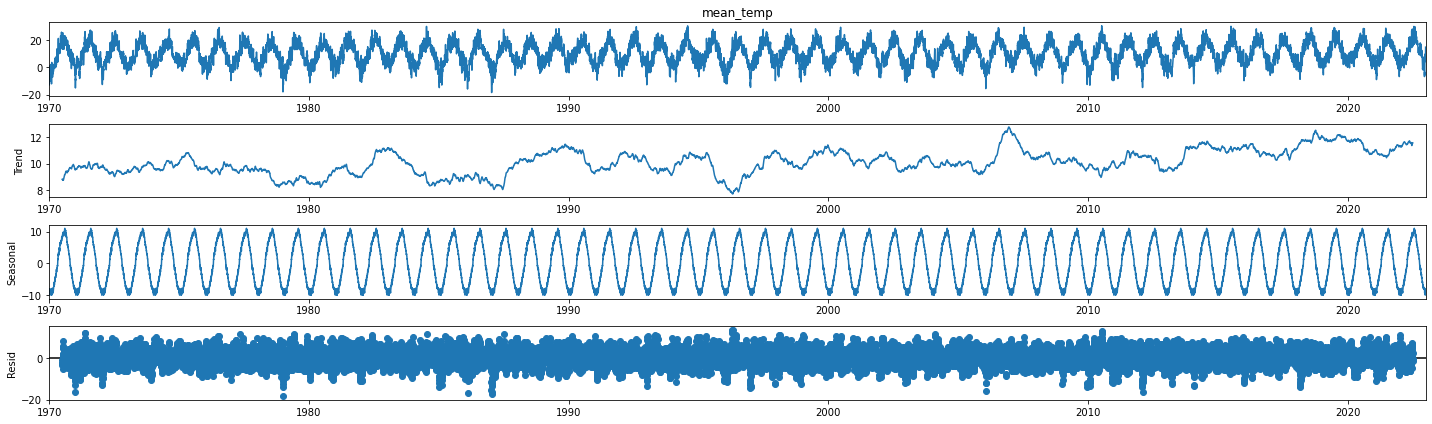

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose


analysis = weather_data_new


decomposition = sm.tsa.seasonal_decompose(analysis['mean_temp'], model='additive',period=365)
decom_fig= decomposition.plot()

<AxesSubplot:xlabel='DATE'>

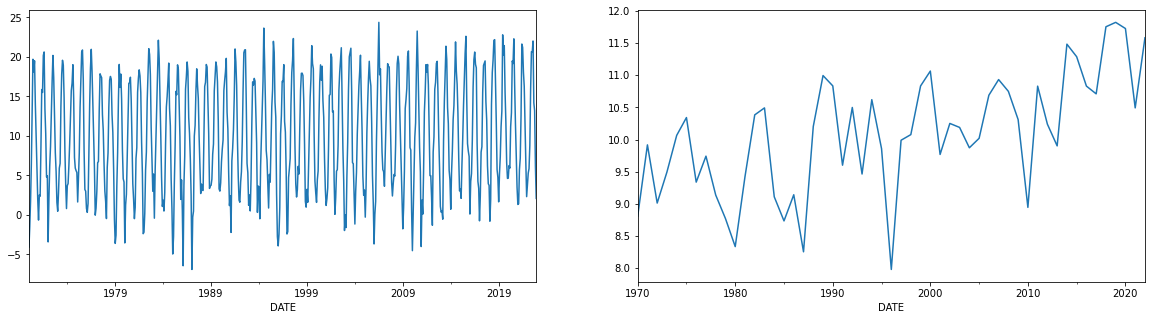

In [27]:
fig,(ax1,ax2) = plt.subplots(ncols=2)
fig.set_size_inches(20, 5)
weather_data_new.mean_temp.resample('m').mean().plot(ax=ax1)
weather_data_new.mean_temp.resample('y').mean().plot(ax=ax2)

<AxesSubplot:xlabel='DATE'>

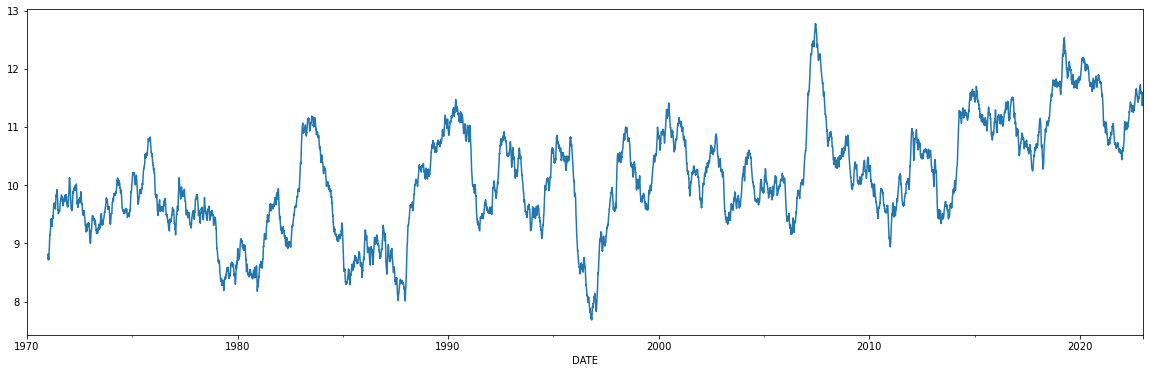

In [28]:
weather_data_new.mean_temp.rolling(window = 365).mean().plot()

<AxesSubplot:xlabel='DATE'>

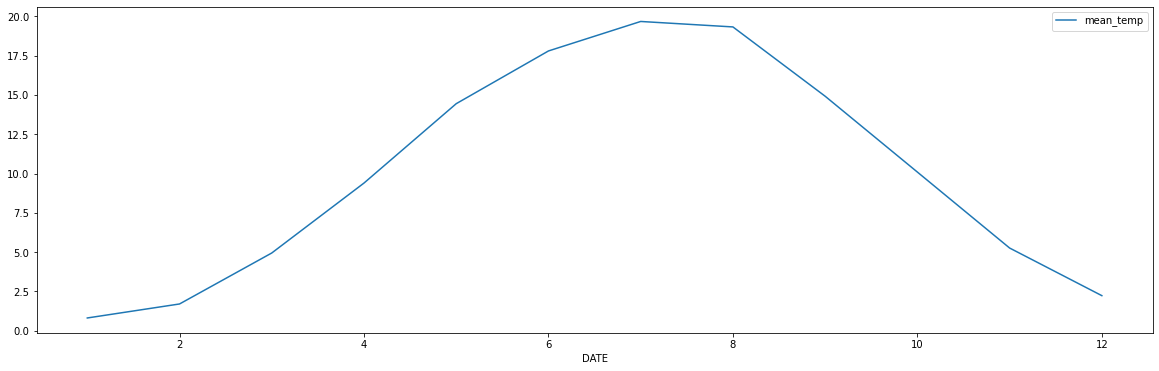

In [29]:
weather_data_new.groupby(weather_data_new.index.month).mean().plot()



In [30]:
#weather_data_new.index.min(), weather_data_new.index.max()

In [31]:
weather_data_new['year'] = weather_data_new.index.year
weather_data_new.head()

mean_temp  year
DATE                       
1970-01-01      -12.8  1970
1970-01-02       -4.9  1970
1970-01-03       -1.4  1970
1970-01-04       -4.4  1970
1970-01-05       -3.0  1970

In [32]:
weather_data_new['month'] = weather_data_new.index.month
weather_data_new.head()

mean_temp  year  month
DATE                              
1970-01-01      -12.8  1970      1
1970-01-02       -4.9  1970      1
1970-01-03       -1.4  1970      1
1970-01-04       -4.4  1970      1
1970-01-05       -3.0  1970      1

In [33]:
weather_data_new['timestep'] = range(len(weather_data_new))
weather_data_new

mean_temp  year  month  timestep
DATE                                        
1970-01-01      -12.8  1970      1         0
1970-01-02       -4.9  1970      1         1
1970-01-03       -1.4  1970      1         2
1970-01-04       -4.4  1970      1         3
1970-01-05       -3.0  1970      1         4
...               ...   ...    ...       ...
2022-12-27        4.2  2022     12     19353
2022-12-28        6.3  2022     12     19354
2022-12-29       10.0  2022     12     19355
2022-12-30        7.6  2022     12     19356
2022-12-31       14.8  2022     12     19357

[19358 rows x 4 columns]

In [34]:
df_train=weather_data_new.loc['1970-01-01':'2016-12-31']


df_test=weather_data_new.loc['2017-01-01':'2021-12-31'][['mean_temp']]

# stationarity or non-stationarity

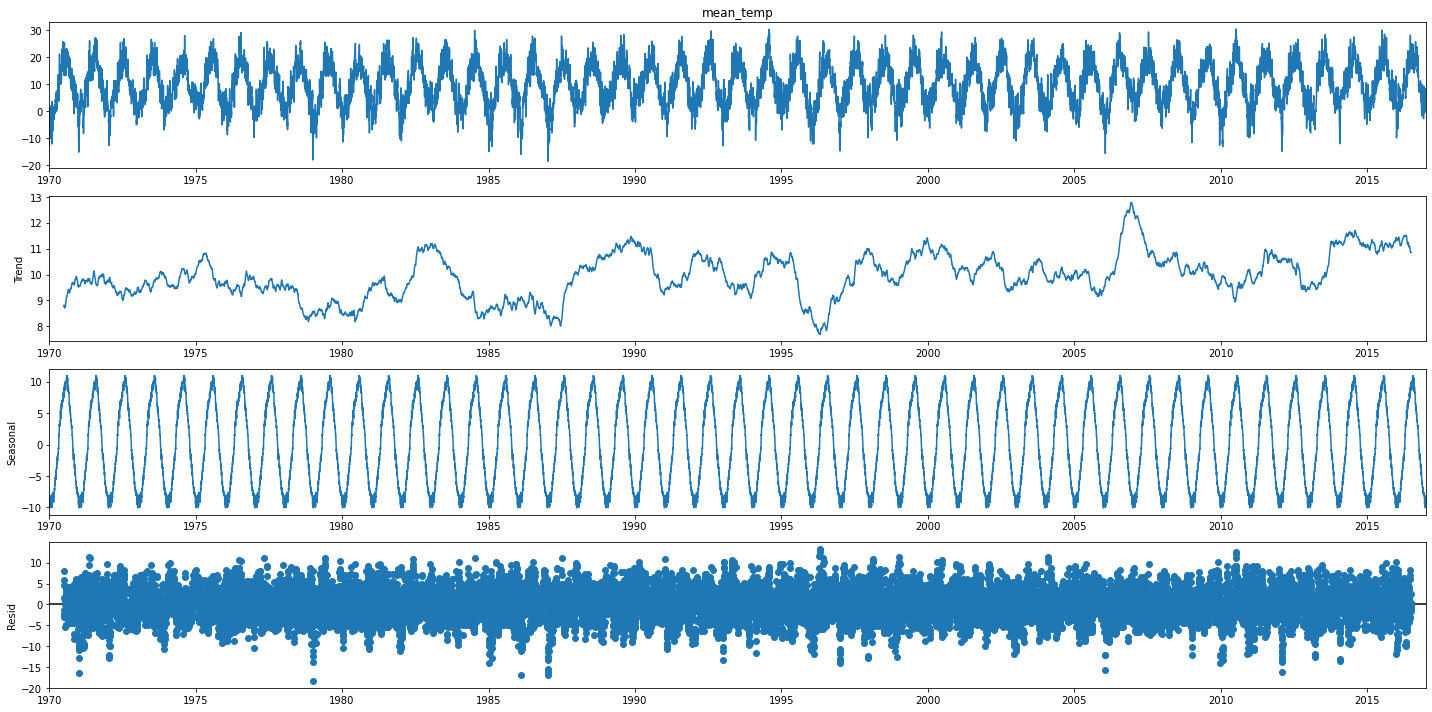

In [35]:
rcParams['figure.figsize'] = 20, 10

decomposition = sm.tsa.seasonal_decompose(df_train['mean_temp'], model='additive',period=365)
decom_fig= decomposition.plot()


<AxesSubplot:>

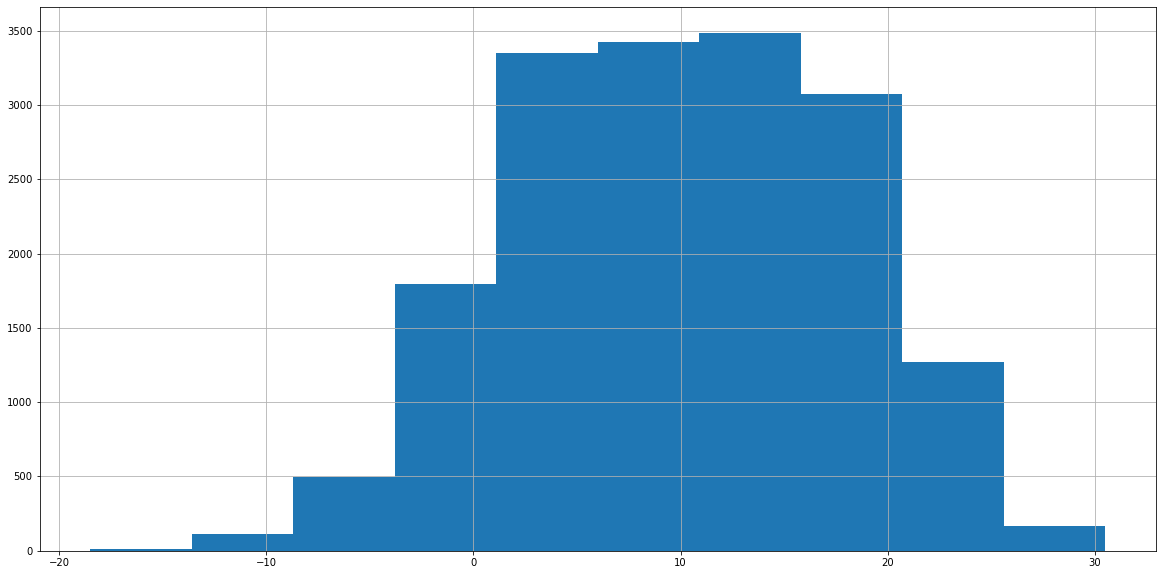

In [36]:
df_train.mean_temp.hist()

<AxesSubplot:ylabel='Density'>

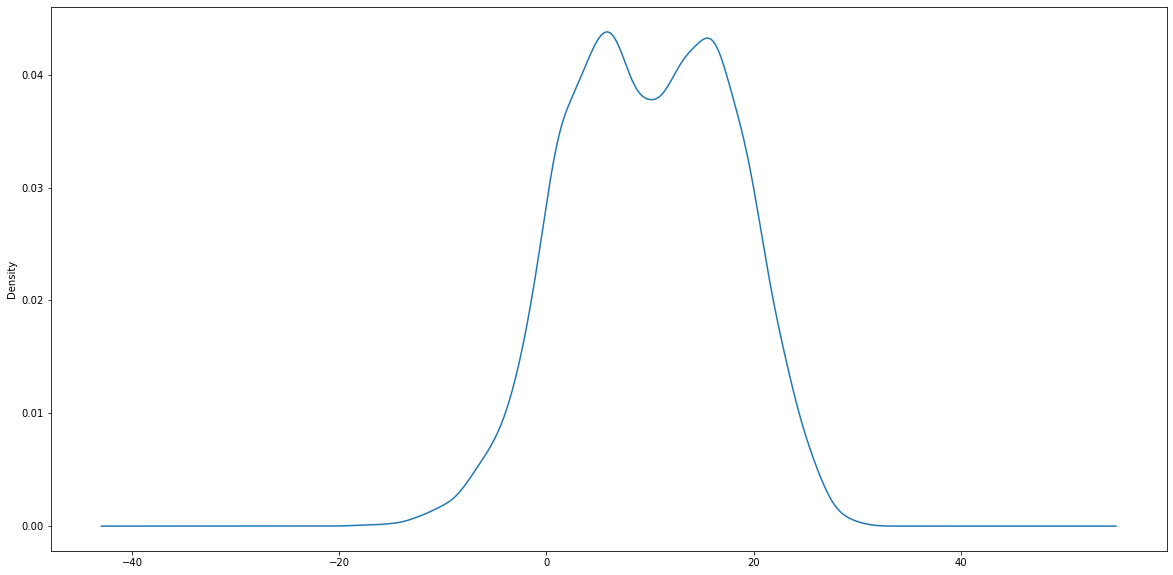

In [37]:
df_train.mean_temp.plot(kind='density')

In [38]:
def adf_test(df):

    result = adfuller(df,autolag='AIC')
    print("Observations of Dickey-fuller test")
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('#Lags: %f' % result[2])
    print('number of observation: %f' % result[3])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if result[0] < result[4]['5%']:
        print ("Reject Ho - Time Series does not have a unit root, it is Stationary")
    else:
        print ("Failed to Reject Ho - Time Series has a unit root, it is Non-Stationary")

In [39]:
adf_test(df_train.mean_temp)

Observations of Dickey-fuller test
ADF Statistic: -8.953904
p-value: 0.000000
#Lags: 17.000000
number of observation: 17149.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Reject Ho - Time Series does not have a unit root, it is Stationary


Text(0.5, 1.0, 'Rolling Mean & Standard Deviation')

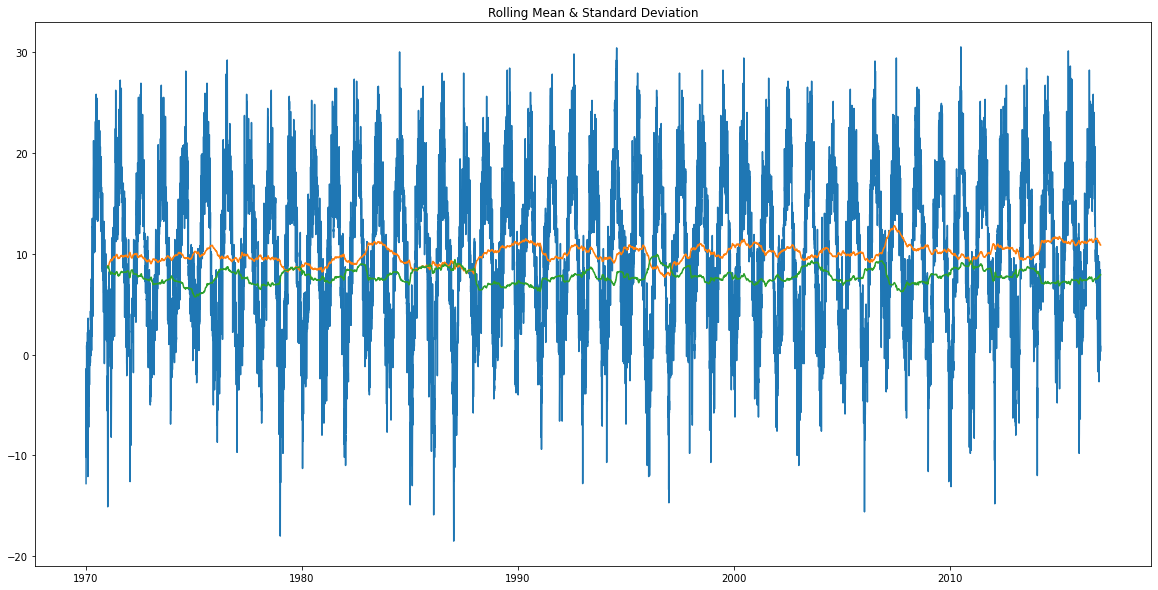

In [40]:
rolling_mean = df_train.mean_temp.rolling(window=365).mean()
rolling_std = df_train.mean_temp.rolling(window=365).std()

original = plt.plot(df_train.mean_temp,  label='Original')
mean = plt.plot(rolling_mean, label='Rolling Mean')
std = plt.plot(rolling_std, label='Rolling Std')
plt.title('Rolling Mean & Standard Deviation')


In [41]:
X = df_train.mean_temp
#split = round(len(X) / 2)
X1, X2 = X['1970-01-01':'1970-12-31'], X['2016-01-01':'2016-12-31']
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))
print('the data is not stationary')

mean1=8.808767, mean2=10.832787
variance1=74.023165, variance2=62.667744
the data is not stationary


In [42]:
X = df_train[['timestep']] 
y = df_train['mean_temp'] 

In [43]:
l_reg = LinearRegression()
l_reg.fit(X, y)

LinearRegression()

In [44]:
df_train['trend'] = l_reg.predict(X)
df_train.head()

<ipython-input-44-3b3209a271d5>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



mean_temp  year  month  timestep     trend
DATE                                                  
1970-01-01      -12.8  1970      1         0  9.146516
1970-01-02       -4.9  1970      1         1  9.146608
1970-01-03       -1.4  1970      1         2  9.146700
1970-01-04       -4.4  1970      1         3  9.146791
1970-01-05       -3.0  1970      1         4  9.146883

<AxesSubplot:xlabel='DATE'>

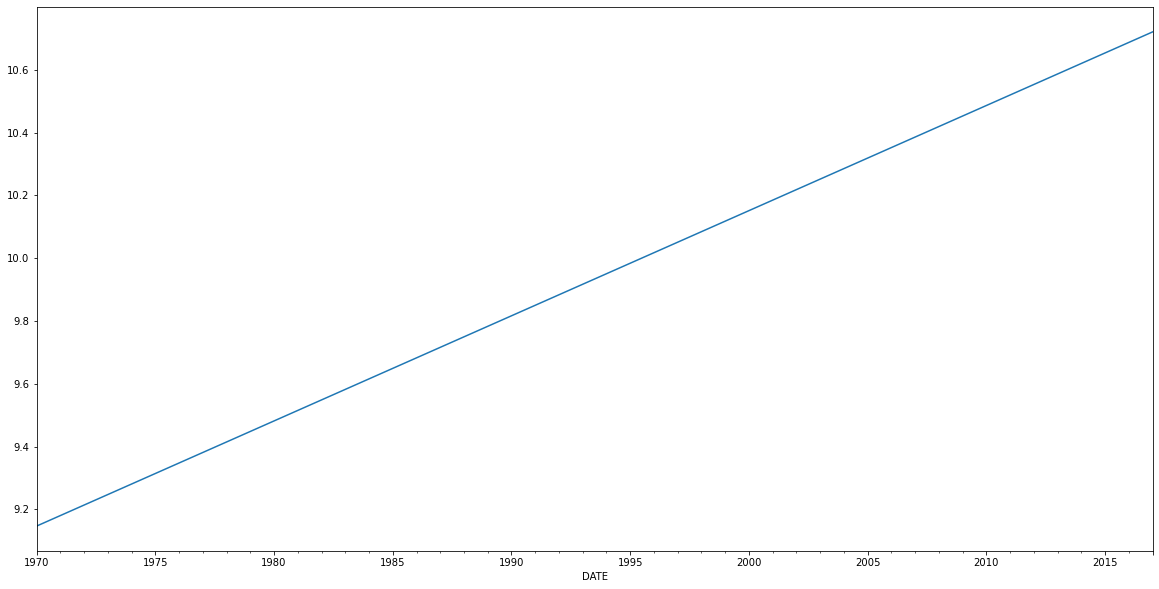

In [45]:
df_train['trend'].plot()

(-20.0, 32.95)

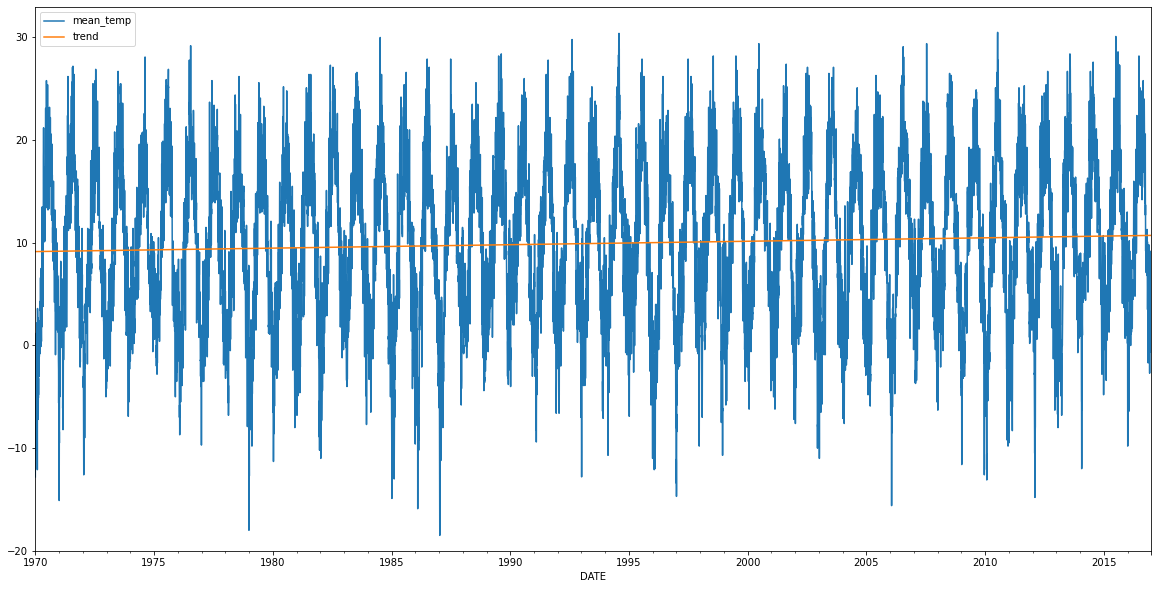

In [46]:
df_train[['mean_temp','trend']].plot()
plt.ylim(ymin=-20)

In [47]:
month_dummies = pd.get_dummies(df_train.index.month_name(), drop_first=True).set_index(df_train.index)
month_dummies

August  December  February  January  July  June  March  May  \
DATE                                                                      
1970-01-01       0         0         0        1     0     0      0    0   
1970-01-02       0         0         0        1     0     0      0    0   
1970-01-03       0         0         0        1     0     0      0    0   
1970-01-04       0         0         0        1     0     0      0    0   
1970-01-05       0         0         0        1     0     0      0    0   
...            ...       ...       ...      ...   ...   ...    ...  ...   
2016-12-27       0         1         0        0     0     0      0    0   
2016-12-28       0         1         0        0     0     0      0    0   
2016-12-29       0         1         0        0     0     0      0    0   
2016-12-30       0         1         0        0     0     0      0    0   
2016-12-31       0         1         0        0     0     0      0    0   

            November  October  September  
DATE                                      
1970-01-01         0        0          0  
1970-01-02         0        0          0  
1970-01-03         0        0          0  
1970-01-04         0        0          0  
1970-01-05         0        0          0  
...              ...      ...        ...  
2016-12-27         0        0          0  
2016-12-28         0        0          0  
2016-12-29         0        0          0  
2016-12-30         0        0          0  
2016-12-31         0        0          0  

[17167 rows x 11 columns]

In [48]:
df_train = df_train.join(month_dummies)
df_train.head()

mean_temp  year  month  timestep     trend  August  December  \
DATE                                                                       
1970-01-01      -12.8  1970      1         0  9.146516       0         0   
1970-01-02       -4.9  1970      1         1  9.146608       0         0   
1970-01-03       -1.4  1970      1         2  9.146700       0         0   
1970-01-04       -4.4  1970      1         3  9.146791       0         0   
1970-01-05       -3.0  1970      1         4  9.146883       0         0   

            February  January  July  June  March  May  November  October  \
DATE                                                                       
1970-01-01         0        1     0     0      0    0         0        0   
1970-01-02         0        1     0     0      0    0         0        0   
1970-01-03         0        1     0     0      0    0         0        0   
1970-01-04         0        1     0     0      0    0         0        0   
1970-01-05         0        1     0     0      0    0         0        0   

            September  
DATE                   
1970-01-01          0  
1970-01-02          0  
1970-01-03          0  
1970-01-04          0  
1970-01-05          0

In [49]:
X_2 = df_train.drop(columns=['mean_temp', 'year', 'month', 'trend']) 

In [50]:
l_reg.fit(X_2, y)

df_train['seasonal_trend'] = l_reg.predict(X_2)
df_train.head()

mean_temp  year  month  timestep     trend  August  December  \
DATE                                                                       
1970-01-01      -12.8  1970      1         0  9.146516       0         0   
1970-01-02       -4.9  1970      1         1  9.146608       0         0   
1970-01-03       -1.4  1970      1         2  9.146700       0         0   
1970-01-04       -4.4  1970      1         3  9.146791       0         0   
1970-01-05       -3.0  1970      1         4  9.146883       0         0   

            February  January  July  June  March  May  November  October  \
DATE                                                                       
1970-01-01         0        1     0     0      0    0         0        0   
1970-01-02         0        1     0     0      0    0         0        0   
1970-01-03         0        1     0     0      0    0         0        0   
1970-01-04         0        1     0     0      0    0         0        0   
1970-01-05         0        1     0     0      0    0         0        0   

            September  seasonal_trend  
DATE                                   
1970-01-01          0       -0.108094  
1970-01-02          0       -0.108009  
1970-01-03          0       -0.107923  
1970-01-04          0       -0.107838  
1970-01-05          0       -0.107752

<AxesSubplot:xlabel='DATE'>

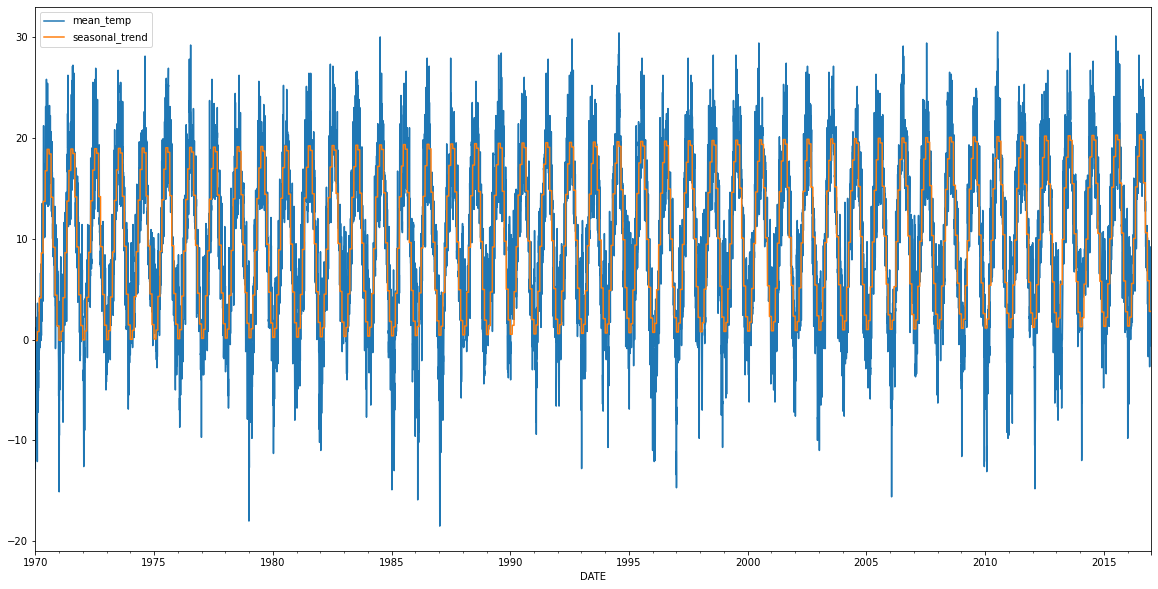

In [51]:
#Plot the original data and the trend with seasonality
df_train[['mean_temp', 'seasonal_trend']].plot()


In [52]:
df_train['remainder']=df_train['mean_temp']-df_train['seasonal_trend']

<AxesSubplot:xlabel='DATE'>

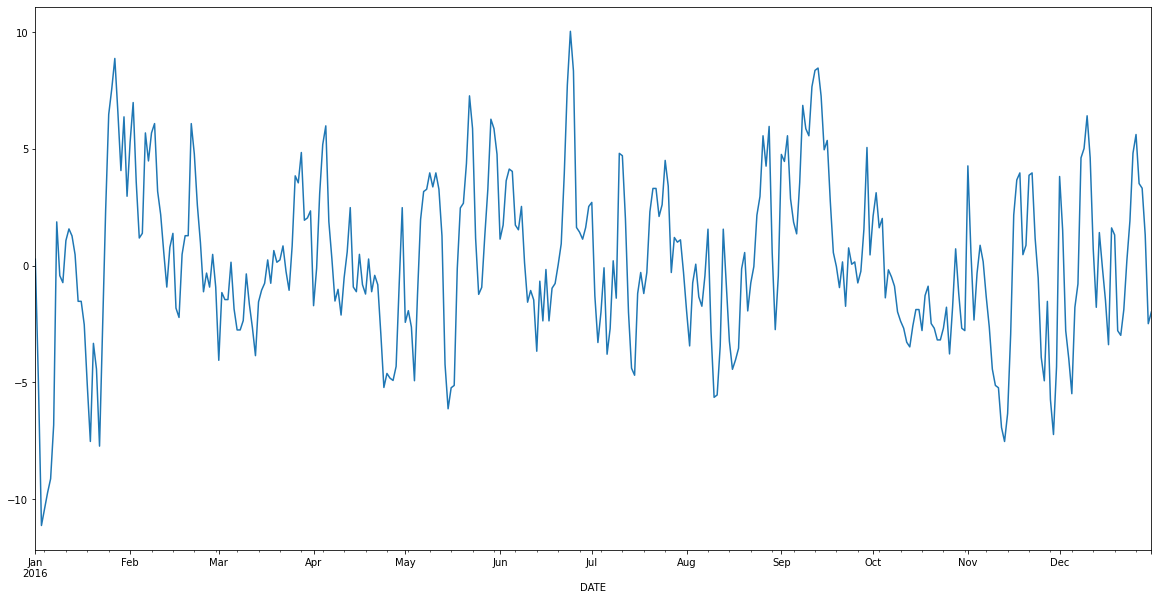

In [53]:
df_train[df_train.index.year==2016]['remainder'].plot()

In [54]:
adf_test(df_train.remainder)

Observations of Dickey-fuller test
ADF Statistic: -38.657866
p-value: 0.000000
#Lags: 3.000000
number of observation: 17163.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Reject Ho - Time Series does not have a unit root, it is Stationary


# AR or MA or ARMA?

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

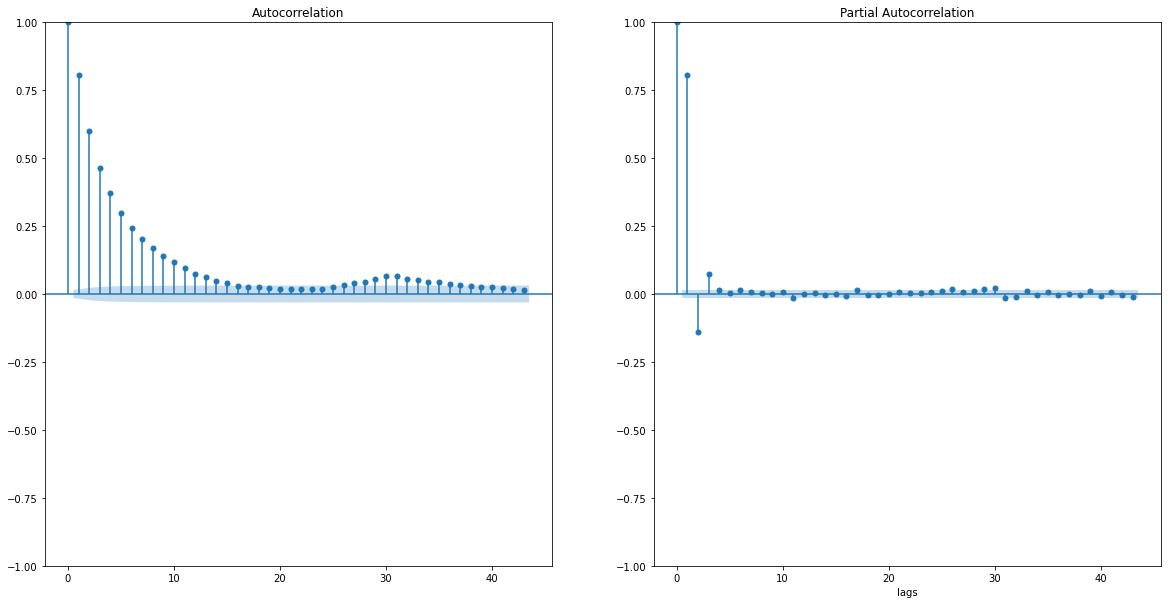

In [55]:
fig,(ax1,ax2) =plt.subplots(ncols=2)

tsaplots.plot_acf(df_train['remainder'],ax=ax1)
tsaplots.plot_pacf(df_train['remainder'],method='ywm',ax=ax2)

plt.xlabel('lags')
plt.tight_layout
#if They do  become abruptly non-significant after a certain lag, which means that it is a moving average process
#If the ACF plot of a stationary process shows a slow decay, then you likely have an autoregressive process.
#if both figures exhibit a slowly decaying pattern or a sinusoidal pattern then you likely have an ARMA
#An ARMA(p,q) process will display a decaying pattern or a sinusoidal pattern on both the ACF and PACF plots. 
#Therefore, they cannot be used to estimate the orders p and q.
#the coefficients are decaying exponentially as the lag increase 

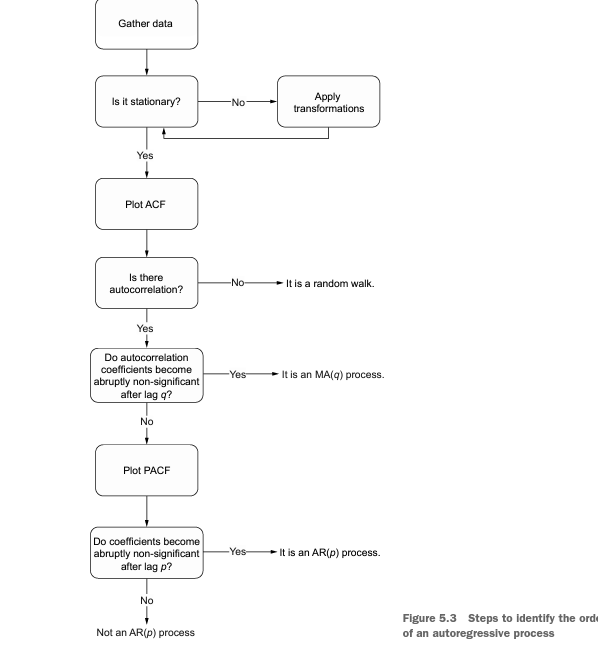

In [56]:
df_train['lag1'] = df_train['remainder'].shift(1)
df_train['lag2'] = df_train['remainder'].shift(2)
df_train['lag3'] = df_train['remainder'].shift(3)

In [57]:
df_train.dropna(inplace=True)
df_train.head()

mean_temp  year  month  timestep     trend  August  December  \
DATE                                                                       
1970-01-04       -4.4  1970      1         3  9.146791       0         0   
1970-01-05       -3.0  1970      1         4  9.146883       0         0   
1970-01-06       -4.7  1970      1         5  9.146975       0         0   
1970-01-07       -7.1  1970      1         6  9.147066       0         0   
1970-01-08      -10.2  1970      1         7  9.147158       0         0   

            February  January  July  ...  March  May  November  October  \
DATE                                 ...                                  
1970-01-04         0        1     0  ...      0    0         0        0   
1970-01-05         0        1     0  ...      0    0         0        0   
1970-01-06         0        1     0  ...      0    0         0        0   
1970-01-07         0        1     0  ...      0    0         0        0   
1970-01-08         0        1     0  ...      0    0         0        0   

            September  seasonal_trend  remainder      lag1      lag2  \
DATE                                                                   
1970-01-04          0       -0.107838  -4.292162 -1.292077 -4.791991   
1970-01-05          0       -0.107752  -2.892248 -4.292162 -1.292077   
1970-01-06          0       -0.107667  -4.592333 -2.892248 -4.292162   
1970-01-07          0       -0.107581  -6.992419 -4.592333 -2.892248   
1970-01-08          0       -0.107496 -10.092504 -6.992419 -4.592333   

                 lag3  
DATE                   
1970-01-04 -12.691906  
1970-01-05  -4.791991  
1970-01-06  -1.292077  
1970-01-07  -4.292162  
1970-01-08  -2.892248  

[5 rows x 21 columns]

<AxesSubplot:>

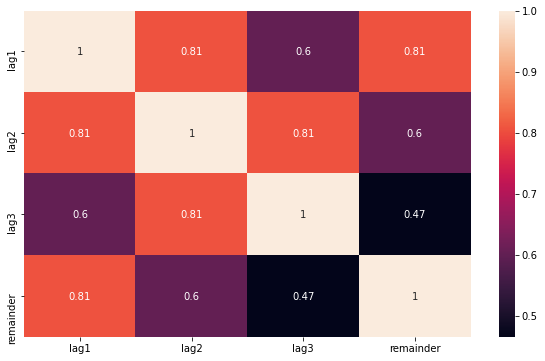

In [58]:
plt.figure(figsize=(10,6))
sns.heatmap(df_train[['lag1','lag2','lag3', 'remainder']].corr(), annot=True)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

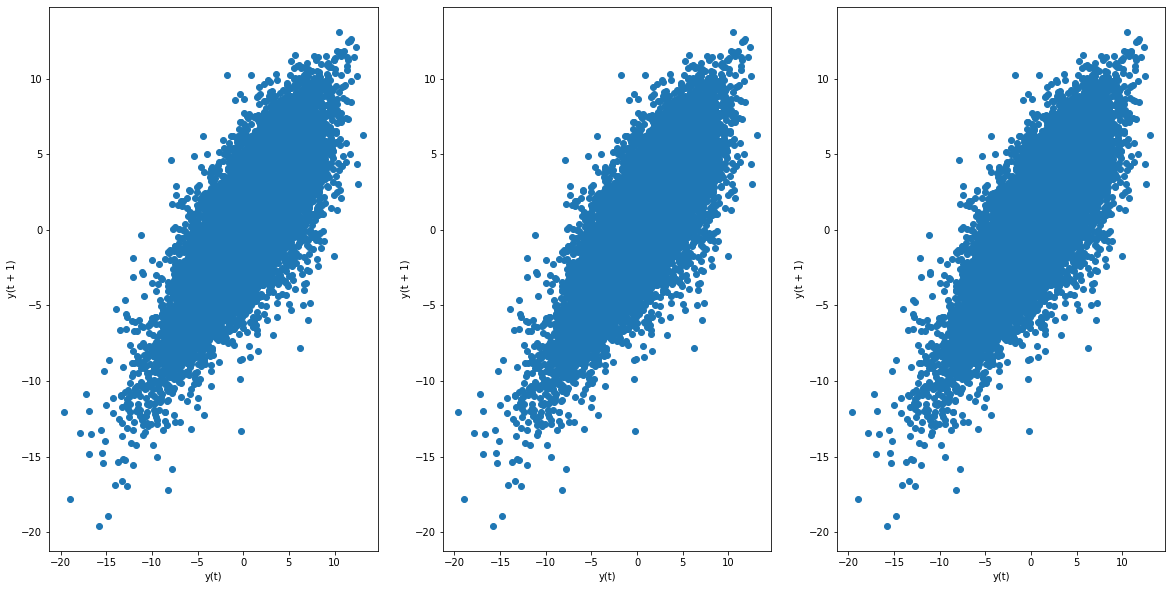

In [59]:
from pandas.plotting import lag_plot
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3)

lag_plot(df_train['lag1'],ax=ax1)
lag_plot(df_train['lag2'],ax=ax2)
lag_plot(df_train['lag3'],ax=ax3)

In [60]:
X_ar = df_train.drop(columns=['mean_temp', 'seasonal_trend', 'remainder','year','month','trend'])
y_ar = df_train['mean_temp']

In [61]:
m_ar = LinearRegression()
m_ar.fit(X_ar, y_ar)


LinearRegression()

In [62]:
df_train['predictions_ar(3)'] = m_ar.predict(X_ar)
df_train.head()

mean_temp  year  month  timestep     trend  August  December  \
DATE                                                                       
1970-01-04       -4.4  1970      1         3  9.146791       0         0   
1970-01-05       -3.0  1970      1         4  9.146883       0         0   
1970-01-06       -4.7  1970      1         5  9.146975       0         0   
1970-01-07       -7.1  1970      1         6  9.147066       0         0   
1970-01-08      -10.2  1970      1         7  9.147158       0         0   

            February  January  July  ...  May  November  October  September  \
DATE                                 ...                                      
1970-01-04         0        1     0  ...    0         0        0          0   
1970-01-05         0        1     0  ...    0         0        0          0   
1970-01-06         0        1     0  ...    0         0        0          0   
1970-01-07         0        1     0  ...    0         0        0          0   
1970-01-08         0        1     0  ...    0         0        0          0   

            seasonal_trend  remainder      lag1      lag2       lag3  \
DATE                                                                   
1970-01-04       -0.107838  -4.292162 -1.292077 -4.791991 -12.691906   
1970-01-05       -0.107752  -2.892248 -4.292162 -1.292077  -4.791991   
1970-01-06       -0.107667  -4.592333 -2.892248 -4.292162  -1.292077   
1970-01-07       -0.107581  -6.992419 -4.592333 -2.892248  -4.292162   
1970-01-08       -0.107496 -10.092504 -6.992419 -4.592333  -2.892248   

            predictions_ar(3)  
DATE                           
1970-01-04          -1.196726  
1970-01-05          -4.137390  
1970-01-06          -1.964406  
1970-01-07          -4.050217  
1970-01-08          -5.829900  

[5 rows x 22 columns]

<AxesSubplot:xlabel='DATE'>

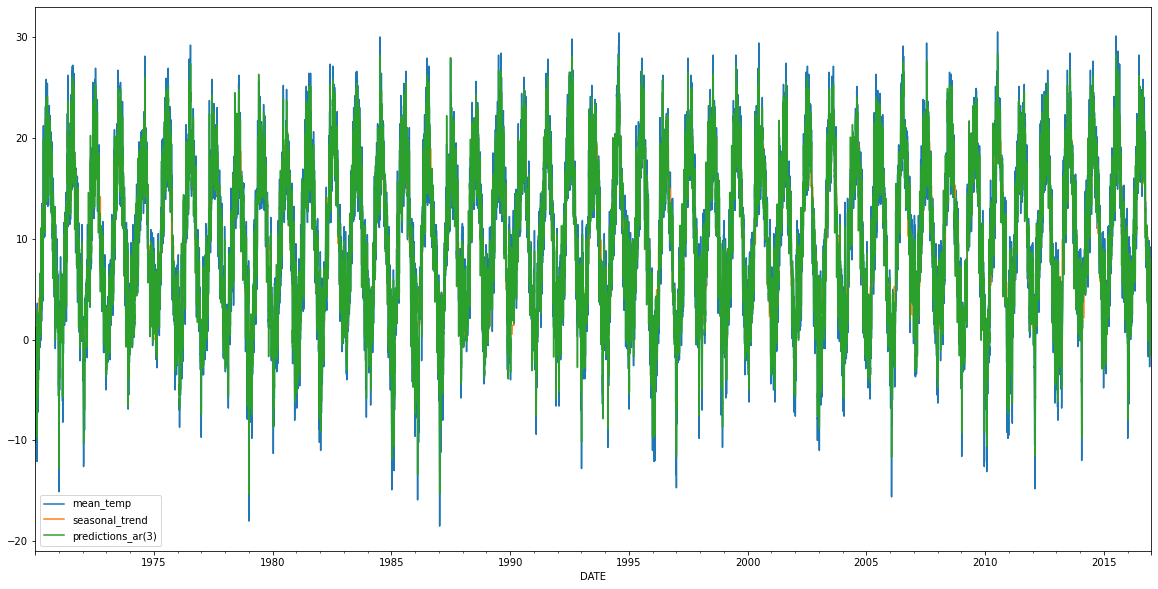

In [63]:
df_train[['mean_temp', 'seasonal_trend','predictions_ar(3)']].plot()

<AxesSubplot:xlabel='DATE'>

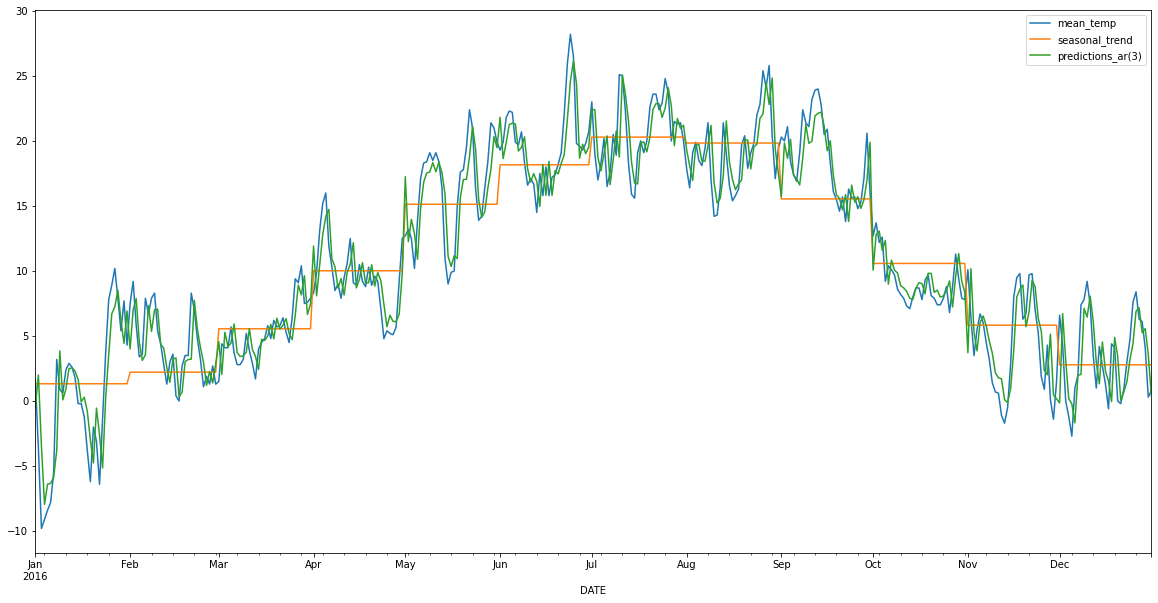

In [64]:
df_train[df_train.index.year==2016][['mean_temp', 'seasonal_trend','predictions_ar(3)']].plot()

In [65]:
m_ar.score(X_ar, y_ar)

0.9137891317657936

In [66]:
time_split = TimeSeriesSplit(n_splits=5)

In [67]:
time_cv = time_split.split(X_ar, y_ar) 

rsquared_scores = cross_val_score(estimator=m_ar, 
                         X=X_ar, y=y_ar,
                         cv=time_cv)
rsquared_scores


array([0.91390487, 0.90125962, 0.90675899, 0.9249546 , 0.92074915])

In [68]:
rsquared_scores.mean(), rsquared_scores.std()

(0.9135254445472618, 0.008708464916033174)

In [69]:
df_test.head()

mean_temp
DATE                 
2017-01-01        2.3
2017-01-02        1.0
2017-01-03        2.7
2017-01-04        2.5
2017-01-05       -2.9

In [70]:
df_test.tail()

mean_temp
DATE                 
2021-12-27       -3.9
2021-12-28       -0.5
2021-12-29        4.5
2021-12-30        9.3
2021-12-31       13.0

In [71]:
last_train_timestep = df_train['timestep'][-1]

In [72]:
last_train_timestep

17166

In [73]:
df_test['timestep'] = list(range(last_train_timestep + 1, len(df_test) + last_train_timestep + 1))

In [74]:
df_test.tail()

mean_temp  timestep
DATE                           
2021-12-27       -3.9     18988
2021-12-28       -0.5     18989
2021-12-29        4.5     18990
2021-12-30        9.3     18991
2021-12-31       13.0     18992

In [75]:
seasonal_dummies = pd.get_dummies(df_test.index.month_name(), drop_first=True).set_index(df_test.index)
df_test = df_test.join(seasonal_dummies)

In [76]:
df_test.head()

mean_temp  timestep  August  December  February  January  July  \
DATE                                                                         
2017-01-01        2.3     17167       0         0         0        1     0   
2017-01-02        1.0     17168       0         0         0        1     0   
2017-01-03        2.7     17169       0         0         0        1     0   
2017-01-04        2.5     17170       0         0         0        1     0   
2017-01-05       -2.9     17171       0         0         0        1     0   

            June  March  May  November  October  September  
DATE                                                        
2017-01-01     0      0    0         0        0          0  
2017-01-02     0      0    0         0        0          0  
2017-01-03     0      0    0         0        0          0  
2017-01-04     0      0    0         0        0          0  
2017-01-05     0      0    0         0        0          0

In [77]:
X_test = df_test.drop('mean_temp', axis=1)

In [78]:
df_test['seasonal_trend'] = l_reg.predict(X_test)
df_test.head()

mean_temp  timestep  August  December  February  January  July  \
DATE                                                                         
2017-01-01        2.3     17167       0         0         0        1     0   
2017-01-02        1.0     17168       0         0         0        1     0   
2017-01-03        2.7     17169       0         0         0        1     0   
2017-01-04        2.5     17170       0         0         0        1     0   
2017-01-05       -2.9     17171       0         0         0        1     0   

            June  March  May  November  October  September  seasonal_trend  
DATE                                                                        
2017-01-01     0      0    0         0        0          0        1.359447  
2017-01-02     0      0    0         0        0          0        1.359532  
2017-01-03     0      0    0         0        0          0        1.359618  
2017-01-04     0      0    0         0        0          0        1.359703  
2017-01-05     0      0    0         0        0          0        1.359789

<AxesSubplot:xlabel='DATE'>

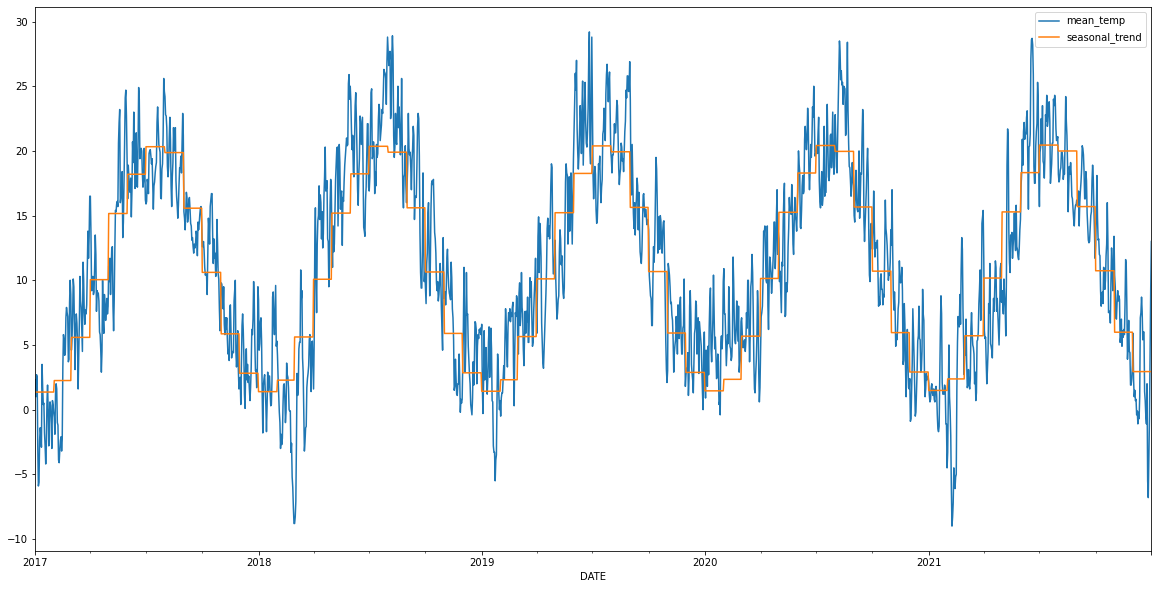

In [79]:
df_test[['mean_temp', 'seasonal_trend']].plot()


In [80]:
df_test['remainder'] = df_test['mean_temp'] - df_test['seasonal_trend']

# Create the lagged variable
df_test['lag1'] = df_test['remainder'].shift(1)
df_test['lag2'] = df_test['remainder'].shift(2)
df_test['lag3'] = df_test['remainder'].shift(3)

df_test.head()

mean_temp  timestep  August  December  February  January  July  \
DATE                                                                         
2017-01-01        2.3     17167       0         0         0        1     0   
2017-01-02        1.0     17168       0         0         0        1     0   
2017-01-03        2.7     17169       0         0         0        1     0   
2017-01-04        2.5     17170       0         0         0        1     0   
2017-01-05       -2.9     17171       0         0         0        1     0   

            June  March  May  November  October  September  seasonal_trend  \
DATE                                                                         
2017-01-01     0      0    0         0        0          0        1.359447   
2017-01-02     0      0    0         0        0          0        1.359532   
2017-01-03     0      0    0         0        0          0        1.359618   
2017-01-04     0      0    0         0        0          0        1.359703   
2017-01-05     0      0    0         0        0          0        1.359789   

            remainder      lag1      lag2      lag3  
DATE                                                 
2017-01-01   0.940553       NaN       NaN       NaN  
2017-01-02  -0.359532  0.940553       NaN       NaN  
2017-01-03   1.340382 -0.359532  0.940553       NaN  
2017-01-04   1.140297  1.340382 -0.359532  0.940553  
2017-01-05  -4.259789  1.140297  1.340382 -0.359532

In [81]:
X_test1 = df_test.drop(['mean_temp', 'seasonal_trend', 'remainder'], axis=1)

X_test1

timestep  August  December  February  January  July  June  March  \
DATE                                                                           
2017-01-01     17167       0         0         0        1     0     0      0   
2017-01-02     17168       0         0         0        1     0     0      0   
2017-01-03     17169       0         0         0        1     0     0      0   
2017-01-04     17170       0         0         0        1     0     0      0   
2017-01-05     17171       0         0         0        1     0     0      0   
...              ...     ...       ...       ...      ...   ...   ...    ...   
2021-12-27     18988       0         1         0        0     0     0      0   
2021-12-28     18989       0         1         0        0     0     0      0   
2021-12-29     18990       0         1         0        0     0     0      0   
2021-12-30     18991       0         1         0        0     0     0      0   
2021-12-31     18992       0         1         0        0     0     0      0   

            May  November  October  September      lag1      lag2      lag3  
DATE                                                                         
2017-01-01    0         0        0          0       NaN       NaN       NaN  
2017-01-02    0         0        0          0  0.940553       NaN       NaN  
2017-01-03    0         0        0          0 -0.359532  0.940553       NaN  
2017-01-04    0         0        0          0  1.340382 -0.359532  0.940553  
2017-01-05    0         0        0          0  1.140297  1.340382 -0.359532  
...         ...       ...      ...        ...       ...       ...       ...  
2021-12-27    0         0        0          0 -9.743012 -8.442926 -0.942841  
2021-12-28    0         0        0          0 -6.843097 -9.743012 -8.442926  
2021-12-29    0         0        0          0 -3.443183 -6.843097 -9.743012  
2021-12-30    0         0        0          0  1.556732 -3.443183 -6.843097  
2021-12-31    0         0        0          0  6.356646  1.556732 -3.443183  

[1826 rows x 15 columns]

In [82]:
X_test1.loc['2017-01-01', 'lag1'] = df_train.loc['2016-12-31','remainder']
X_test1.loc['2017-01-02', 'lag2'] = df_train.loc['2016-12-31','remainder']
X_test1.loc['2017-01-03', 'lag3'] = df_train.loc['2016-12-31','remainder']

X_test1.loc['2017-01-01', 'lag2'] = df_train.loc['2016-12-31', 'lag1']
X_test1.loc['2017-01-02', 'lag3'] = df_train.loc['2016-12-31', 'lag1']

X_test1.loc['2017-01-01', 'lag3'] = df_train.loc['2016-12-31', 'lag2']
X_test1.head()

timestep  August  December  February  January  July  June  March  \
DATE                                                                           
2017-01-01     17167       0         0         0        1     0     0      0   
2017-01-02     17168       0         0         0        1     0     0      0   
2017-01-03     17169       0         0         0        1     0     0      0   
2017-01-04     17170       0         0         0        1     0     0      0   
2017-01-05     17171       0         0         0        1     0     0      0   

            May  November  October  September      lag1      lag2      lag3  
DATE                                                                         
2017-01-01    0         0        0          0 -1.987342 -2.487256  1.312829  
2017-01-02    0         0        0          0  0.940553 -1.987342 -2.487256  
2017-01-03    0         0        0          0 -0.359532  0.940553 -1.987342  
2017-01-04    0         0        0          0  1.340382 -0.359532  0.940553  
2017-01-05    0         0        0          0  1.140297  1.340382 -0.359532

In [83]:
X_test1.size

27390

In [84]:
df_test.size

32868

In [85]:
# Create the predictions

df_test['pred_ar_test'] = m_ar.predict(X_test1)

df_test.head()

mean_temp  timestep  August  December  February  January  July  \
DATE                                                                         
2017-01-01        2.3     17167       0         0         0        1     0   
2017-01-02        1.0     17168       0         0         0        1     0   
2017-01-03        2.7     17169       0         0         0        1     0   
2017-01-04        2.5     17170       0         0         0        1     0   
2017-01-05       -2.9     17171       0         0         0        1     0   

            June  March  May  November  October  September  seasonal_trend  \
DATE                                                                         
2017-01-01     0      0    0         0        0          0        1.359447   
2017-01-02     0      0    0         0        0          0        1.359532   
2017-01-03     0      0    0         0        0          0        1.359618   
2017-01-04     0      0    0         0        0          0        1.359703   
2017-01-05     0      0    0         0        0          0        1.359789   

            remainder      lag1      lag2      lag3  pred_ar_test  
DATE                                                               
2017-01-01   0.940553       NaN       NaN       NaN      0.158495  
2017-01-02  -0.359532  0.940553       NaN       NaN      2.503308  
2017-01-03   1.340382 -0.359532  0.940553       NaN      0.726944  
2017-01-04   1.140297  1.340382 -0.359532  0.940553      2.786968  
2017-01-05  -4.259789  1.140297  1.340382 -0.359532      2.156607

<AxesSubplot:xlabel='DATE'>

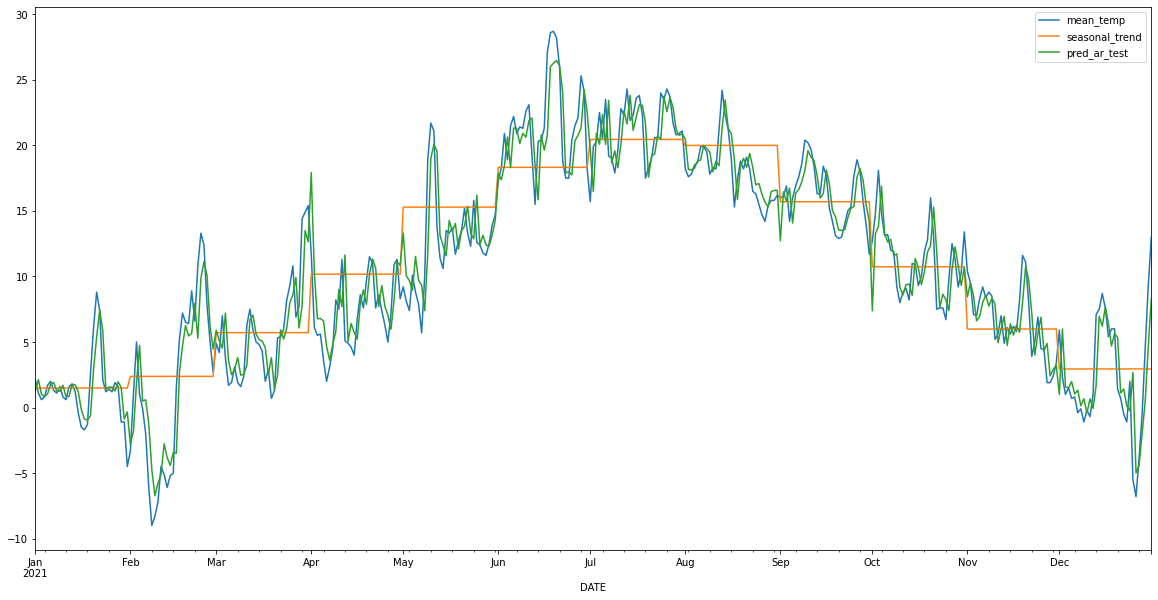

In [86]:

df_test[df_test.index.year==2021][['mean_temp', 'seasonal_trend','pred_ar_test']].plot()

In [87]:
print("R2 score seasonal_trend Model: ",r2_score(df_test['mean_temp'], df_test['seasonal_trend']))

print("R2 score Autoregressive Model: ",r2_score(df_test['mean_temp'], df_test['pred_ar_test']))

R2 score seasonal_trend Model:  0.7662901848196622
R2 score Autoregressive Model:  0.918405355565989


In [88]:
print("MSE seasonal_trend Model: ", mean_squared_error(df_test['mean_temp'], df_test['seasonal_trend']))

print("MSE Autoregressive Model: ", mean_squared_error(df_test['mean_temp'], df_test['pred_ar_test']))


MSE seasonal_trend Model:  13.766985480877537
MSE Autoregressive Model:  4.806440347289696


In [115]:
df_train=df_train.drop(['year','month','trend','predictions_ar(3)'],axis=1)
df_combined = df_train.append(df_test)
df_combined.tail()

mean_temp  timestep  August  December  February  January  July  \
DATE                                                                         
2021-12-27       -3.9     18988       0         1         0        0     0   
2021-12-28       -0.5     18989       0         1         0        0     0   
2021-12-29        4.5     18990       0         1         0        0     0   
2021-12-30        9.3     18991       0         1         0        0     0   
2021-12-31       13.0     18992       0         1         0        0     0   

            June  March  May  November  October  September  seasonal_trend  \
DATE                                                                         
2021-12-27     0      0    0         0        0          0        2.943097   
2021-12-28     0      0    0         0        0          0        2.943183   
2021-12-29     0      0    0         0        0          0        2.943268   
2021-12-30     0      0    0         0        0          0        2.943354   
2021-12-31     0      0    0         0        0          0        2.943439   

            remainder      lag1      lag2      lag3  pred_ar_test  
DATE                                                               
2021-12-27  -6.843097 -9.743012 -8.442926 -0.942841     -4.424322  
2021-12-28  -3.443183 -6.843097 -9.743012 -8.442926     -2.001419  
2021-12-29   1.556732 -3.443183 -6.843097 -9.743012      0.467776  
2021-12-30   6.356646  1.556732 -3.443183 -6.843097      4.624623  
2021-12-31  10.056561  6.356646  1.556732 -3.443183      8.301657

In [116]:
X_combined = df_combined.drop(columns=['mean_temp', 'seasonal_trend', 'remainder', 'pred_ar_test'],axis=1)
y_combined = df_combined['mean_temp']

In [121]:
X_combined.isnull().sum()

timestep     0
August       0
December     0
February     0
January      0
July         0
June         0
March        0
May          0
November     0
October      0
September    0
lag1         1
lag2         2
lag3         3
dtype: int64

In [122]:
X_combined.loc['2017-01-01', 'lag1'] = df_train.loc['2016-12-31','remainder']
X_combined.loc['2017-01-02', 'lag2'] = df_train.loc['2016-12-31','remainder']
X_combined.loc['2017-01-03', 'lag3'] = df_train.loc['2016-12-31','remainder']

X_combined.loc['2017-01-01', 'lag2'] = df_train.loc['2016-12-31', 'lag1']
X_combined.loc['2017-01-02', 'lag3'] = df_train.loc['2016-12-31', 'lag1']

X_combined.loc['2017-01-01', 'lag3'] = df_train.loc['2016-12-31', 'lag2']
X_combined.head()

timestep  August  December  February  January  July  June  March  \
DATE                                                                           
1970-01-04         3       0         0         0        1     0     0      0   
1970-01-05         4       0         0         0        1     0     0      0   
1970-01-06         5       0         0         0        1     0     0      0   
1970-01-07         6       0         0         0        1     0     0      0   
1970-01-08         7       0         0         0        1     0     0      0   

            May  November  October  September      lag1      lag2       lag3  
DATE                                                                          
1970-01-04    0         0        0          0 -1.292077 -4.791991 -12.691906  
1970-01-05    0         0        0          0 -4.292162 -1.292077  -4.791991  
1970-01-06    0         0        0          0 -2.892248 -4.292162  -1.292077  
1970-01-07    0         0        0          0 -4.592333 -2.892248  -4.292162  
1970-01-08    0         0        0          0 -6.992419 -4.592333  -2.892248

In [123]:
modelar_combined = LinearRegression()
modelar_combined.fit(X_combined, y_combined)

LinearRegression()

In [125]:
df_combined.index[-1]

Timestamp('2021-12-31 00:00:00')

In [127]:
timestep = df_combined['timestep'].max() + 1
months = [0]*3 + [1] + [0]*7   #dummy code for Jan
lag1 = df_combined.loc['2021-12-31', 'remainder'] 
lag2 = df_combined.loc['2021-12-31', 'lag1'] 
lag3 = df_combined.loc['2021-12-31', 'lag2'] 
print(timestep, months, lag1,lag2,lag3)

18993 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0] 10.056560790959304 6.356646277103814 1.5567317632483233


In [129]:
X_future=[]

X_future.append(timestep)
X_future.extend(months)
X_future.append(lag1)
X_future.append(lag2)
X_future.append(lag3)
print(X_future)

[18993, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 10.056560790959304, 6.356646277103814, 1.5567317632483233]


In [130]:
X_future = pd.DataFrame([X_future])
X_future.columns = X_combined.columns

X_future

timestep  August  December  February  January  July  June  March  May  \
0     18993       0         0         0        1     0     0      0    0   

   November  October  September       lag1      lag2      lag3  
0         0        0          0  10.056561  6.356646  1.556732

In [136]:
print(f"Prediction for 2022-01-01 is {modelar_combined.predict(X_future)[0]}")

Prediction for 2022-01-01 is 9.738393312633333


In [137]:
weather_data.loc['2022-01-01']['mean_temp']

12.0

In [90]:
selected_order = ar_select_order(df_train['remainder'], maxlag = 12)

C:\Users\96650\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\96650\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



In [91]:
selected_order.ar_lags

[1, 2, 3]

In [150]:
ar1 = AutoReg(endog=df_train['remainder'], lags=1).fit()
df_train['predictions_ar1']= df_train['seasonal_trend'] + ar1.predict()

C:\Users\96650\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



In [139]:
summ1=ar1.summary()
summ1

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:              remainder   No. Observations:                17164
Model:                     AutoReg(1)   Log Likelihood              -38856.498
Method:               Conditional MLE   S.D. of innovations              2.328
Date:                Tue, 11 Apr 2023   AIC                          77718.997
Time:                        12:29:53   BIC                          77742.248
Sample:                    01-05-1970   HQIC                         77726.661
                         - 12-31-2016                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0004      0.018      0.021      0.983      -0.034       0.035
remainder.L1     0.8067      0.005    178.859      0.000       0.798       0.816
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2396           +0.0000j            1.2396            0.0000
-----------------------------------------------------------------------------
"""

In [151]:
ar2 = AutoReg(endog=df_train['remainder'], lags=2).fit()
df_train['predictions_ar2']= df_train['seasonal_trend'] + ar2.predict()

C:\Users\96650\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



In [141]:
summ2=ar2.summary()
summ2

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:              remainder   No. Observations:                17164
Model:                     AutoReg(2)   Log Likelihood              -38684.253
Method:               Conditional MLE   S.D. of innovations              2.305
Date:                Tue, 11 Apr 2023   AIC                          77376.507
Time:                        12:30:01   BIC                          77407.508
Sample:                    01-06-1970   HQIC                         77386.725
                         - 12-31-2016                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0004      0.018      0.020      0.984      -0.034       0.035
remainder.L1     0.9199      0.008    121.709      0.000       0.905       0.935
remainder.L2    -0.1402      0.008    -18.556      0.000      -0.155      -0.125
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3756           +0.0000j            1.3756            0.0000
AR.2            5.1837           +0.0000j            5.1837            0.0000
-----------------------------------------------------------------------------
"""

In [152]:
ar3 = AutoReg(endog=df_train['remainder'], lags=3).fit()
df_train['predictions_ar3']= df_train['seasonal_trend'] + ar3.predict()

C:\Users\96650\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



In [143]:
summ3=ar3.summary()
summ3

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:              remainder   No. Observations:                17164
Model:                     AutoReg(3)   Log Likelihood              -38637.586
Method:               Conditional MLE   S.D. of innovations              2.299
Date:                Tue, 11 Apr 2023   AIC                          77285.172
Time:                        12:30:04   BIC                          77323.924
Sample:                    01-07-1970   HQIC                         77297.945
                         - 12-31-2016                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0005      0.018      0.029      0.977      -0.034       0.035
remainder.L1     0.9299      0.008    122.142      0.000       0.915       0.945
remainder.L2    -0.2063      0.010    -20.050      0.000      -0.226      -0.186
remainder.L3     0.0718      0.008      9.426      0.000       0.057       0.087
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2763           -0.0000j            1.2763           -0.0000
AR.2            0.7992           -3.2061j            3.3042           -0.2111
AR.3            0.7992           +3.2061j            3.3042            0.2111
-----------------------------------------------------------------------------
"""

In [148]:
best_fit= pd.DataFrame({'q':['1','2','3'],
                        'Log Likelihood':['-38856.498','-38684.253','-38637.586'],
                       'AIC':['77718.997','77376.507','77285.172']})
best_fit=best_fit.sort_values(by='Log Likelihood')
best_fit
#The likelihood function measures the goodness of fit of a model.
#”If it is very likely, meaning that Lˆ is large, then the AR(q) model fits the data well.
# if a model fits the data really well, the maximum value of the likelihood will be high.
#then a large value of Lˆ will lower the AIC.
#the lower the AIC, the better the model relative to other models
#the AIC allows us to find a balance between the number of parameters in a model and a good fit to the training data.

q Log Likelihood        AIC
2  3     -38637.586  77285.172
1  2     -38684.253  77376.507
0  1     -38856.498  77718.997

<AxesSubplot:xlabel='DATE'>

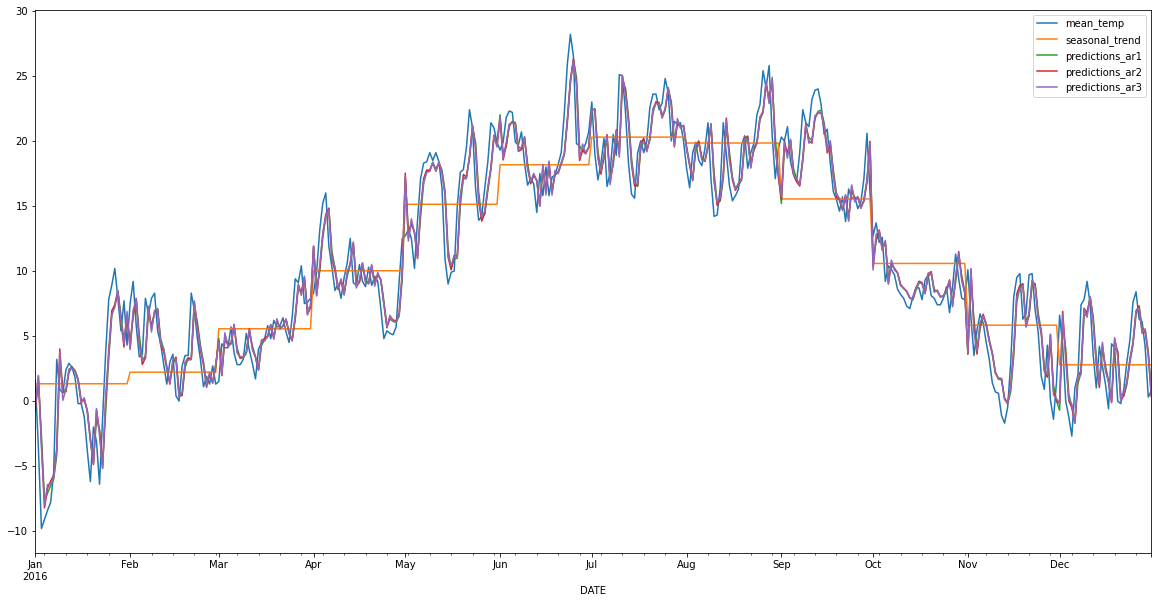

In [168]:


df_train[df_train.index.year==2016][['mean_temp','seasonal_trend','predictions_ar1','predictions_ar2','predictions_ar3']].plot()




In [94]:
#plt.figure(figsize=(20,10))
#df_test['mean_temp'].plot()

In [95]:
#plt.figure(figsize=(20,10))

#acf_plot = plot_acf(weather_data_new.mean_temp, lags=100 )


In [96]:
#pacf_plot = plot_pacf(weather_data_new.mean_temp)

In [97]:

#plt.figure(figsize=(20,10))
#rolling_mean = weather_data_new.rolling(window = 50).mean()
#rolling_std = weather_data_new.rolling(window = 50).std()
#plt.plot(weather_data_new, color = 'blue', label = 'Original')
#plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
#plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
#plt.legend(loc = 'best')
#plt.title('Rolling Mean & Rolling Standard Deviation')
#plt.show()

In [98]:
#def get_stationarity(timeseries):
    
    # rolling statistics
   # rolling_mean = timeseries.rolling(window=12).mean()
   # rolling_std = timeseries.rolling(window=12).std()
    
    # rolling statistics plot
   # original = plt.plot(timeseries, color='blue', label='Original')
  #  mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
   # std = plt.plot(rolling_std, color='black', label='Rolling Std')
 #   plt.legend(loc='best')
 #   plt.title('Rolling Mean & Standard Deviation')
  #  plt.show(block=False)
    
    # Dickey–Fuller test:
 #   result = adfuller(timeseries['Passengers'])
#    print('ADF Statistic: {}'.format(result[0]))
 #   print('p-value: {}'.format(result[1]))
  #  print('Critical Values:')
  #  for key, value in result[4].items():
    #    print('\t{}: {}'.format(key, value))

In [99]:
#rolling_mean = weather_data_new.rolling(window=12).mean()
#df_log_minus_mean = weather_data_new - rolling_mean
#df_log_minus_mean.dropna(inplace=True)
#get_stationarity(df_log_minus_mean)

In [100]:
#result = adfuller(weather_data_new.mean_temp)
#print('ADF Statistic: {}'.format(result[0]))
#print('p-value: {}'.format(result[1]))
#print('Critical Values:')
#for key, value in result[4].items():
   # print('\t{}: {}'.format(key, value))

In [101]:
#plt.figure(figsize=(20,10))
#plt.plot(df_train.mean_temp)
#plt.title('temp over Time', fontsize=16)
#plt.ylabel('temp', fontsize=16)
#for year in range(1970,2017):
  #  plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)


In [102]:
#plt.figure(figsize=(20,10))

#acf_plot = plot_acf(df_train.mean_temp, lags=100 )

In [103]:
#pacf_plot = plot_pacf(df_train.mean_temp)

In [104]:
#plt.figure(figsize=(20,10))
#plt.plot(df_test.mean_temp)
#plt.title('temp over Time', fontsize=16)
#plt.ylabel('temp', fontsize=16)
#for year in range(2017,2023):
  #  plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)
#

In [105]:
#plt.figure(figsize=(20,10))

#acf_plot = plot_acf(df_test.mean_temp, lags=100 )

In [106]:
#pacf_plot = plot_pacf(df_test.mean_temp)

In [107]:
#test_result=adfuller(weather_data['mean_temp'])

In [108]:
#def adfuller_test(temp):
   # result=adfuller(temp)
   # labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
   # for value,label in zip(result,labels):
      #  print(label+' : '+str(value) )
  #  if result[1] <= 0.05:
       # print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
  #  else:
      #  print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [109]:
#adfuller_test(weather_data['mean_temp'])

In [110]:
#acf_values = acf(weather_data['mean_temp'])


In [111]:
#plot_acf(weather_data['mean_temp'], lags=50);


In [112]:
#pacf_values = (weather_data['mean_temp'])
#plot_pacf(weather_data['mean_temp'], lags=30)

In [113]:
#The likelihood function measures the goodness of fit of a model